In [2]:
from pathlib import Path
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Create a file path
filepath = "../Resources/data.csv"
# Read in the data.
df = pd.read_csv(filepath)
df.head()

,Card,Quantity,Pilot,Archetype,Event,Date Posted,Main/Sideboard,Mana Value,Mana Cost,Colours,Most Recent Printing,Card Text,Type Line,Price EUR,Price USD,Rarity
0,Hallowed Fountain,4,Pilot 1,Azorius Control,MTG China Open,2023-06-06,Mainboard,0.0,NaN,[],2019-01-25,({T}: Add {W} or {U}.)\nAs Hallowed Fountain e...,Land — Plains Island,11.93,11.31,rare
1,Prairie Stream,2,Pilot 1,Azorius Control,MTG China Open,2023-06-06,Mainboard,0.0,NaN,[],2023-04-21,({T}: Add {W} or {U}.)\nPrairie Stream enters ...,Land — Plains Island,0.21,0.16,rare
2,Irrigated Farmland,4,Pilot 1,Azorius Control,MTG China Open,2023-06-06,Mainboard,0.0,NaN,[],2020-04-17,({T}: Add {W} or {U}.)\nIrrigated Farmland ent...,Land — Plains Island,0.76,0.96,rare
3,Field of Ruin,2,Pilot 1,Azorius Control,MTG China Open,2023-06-06,Mainboard,0.0,NaN,[],2023-04-21,"{T}: Add {C}.\n{2}, {T}, Sacrifice Field of Ru...",Land,0.05,0.15,uncommon
4,Fabled Passage,4,Pilot 1,Azorius Control,MTG China Open,2023-06-06,Mainboard,0.0,NaN,[],2020-07-03,"{T}, Sacrifice Fabled Passage: Search your lib...",Land,3.70,4.80,rare


In [4]:
#drop Date Posted column
df.drop(columns=["Date Posted"], inplace=True)

In [5]:
df.head()

,Card,Quantity,Pilot,Archetype,Event,Main/Sideboard,Mana Value,Mana Cost,Colours,Most Recent Printing,Card Text,Type Line,Price EUR,Price USD,Rarity
0,Hallowed Fountain,4,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,NaN,[],2019-01-25,({T}: Add {W} or {U}.)\nAs Hallowed Fountain e...,Land — Plains Island,11.93,11.31,rare
1,Prairie Stream,2,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,NaN,[],2023-04-21,({T}: Add {W} or {U}.)\nPrairie Stream enters ...,Land — Plains Island,0.21,0.16,rare
2,Irrigated Farmland,4,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,NaN,[],2020-04-17,({T}: Add {W} or {U}.)\nIrrigated Farmland ent...,Land — Plains Island,0.76,0.96,rare
3,Field of Ruin,2,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,NaN,[],2023-04-21,"{T}: Add {C}.\n{2}, {T}, Sacrifice Field of Ru...",Land,0.05,0.15,uncommon
4,Fabled Passage,4,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,NaN,[],2020-07-03,"{T}, Sacrifice Fabled Passage: Search your lib...",Land,3.70,4.80,rare


In [6]:
#Drop Price EUR column
df.drop(columns=["Price EUR"], inplace=True)

In [7]:
df.head()

,Card,Quantity,Pilot,Archetype,Event,Main/Sideboard,Mana Value,Mana Cost,Colours,Most Recent Printing,Card Text,Type Line,Price USD,Rarity
0,Hallowed Fountain,4,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,NaN,[],2019-01-25,({T}: Add {W} or {U}.)\nAs Hallowed Fountain e...,Land — Plains Island,11.31,rare
1,Prairie Stream,2,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,NaN,[],2023-04-21,({T}: Add {W} or {U}.)\nPrairie Stream enters ...,Land — Plains Island,0.16,rare
2,Irrigated Farmland,4,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,NaN,[],2020-04-17,({T}: Add {W} or {U}.)\nIrrigated Farmland ent...,Land — Plains Island,0.96,rare
3,Field of Ruin,2,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,NaN,[],2023-04-21,"{T}: Add {C}.\n{2}, {T}, Sacrifice Field of Ru...",Land,0.15,uncommon
4,Fabled Passage,4,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,NaN,[],2020-07-03,"{T}, Sacrifice Fabled Passage: Search your lib...",Land,4.80,rare


In [8]:
#separte artifacts from lands
df.loc[df["Type Line"].str.contains("Land"), "Colours"] = "['L']"

#remove null values from Lands
df.loc[df["Mana Cost"].isna(), "Mana Cost"] = "['L']"

df.head() #final clean version of the data set

,Card,Quantity,Pilot,Archetype,Event,Main/Sideboard,Mana Value,Mana Cost,Colours,Most Recent Printing,Card Text,Type Line,Price USD,Rarity
0,Hallowed Fountain,4,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,['L'],['L'],2019-01-25,({T}: Add {W} or {U}.)\nAs Hallowed Fountain e...,Land — Plains Island,11.31,rare
1,Prairie Stream,2,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,['L'],['L'],2023-04-21,({T}: Add {W} or {U}.)\nPrairie Stream enters ...,Land — Plains Island,0.16,rare
2,Irrigated Farmland,4,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,['L'],['L'],2020-04-17,({T}: Add {W} or {U}.)\nIrrigated Farmland ent...,Land — Plains Island,0.96,rare
3,Field of Ruin,2,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,['L'],['L'],2023-04-21,"{T}: Add {C}.\n{2}, {T}, Sacrifice Field of Ru...",Land,0.15,uncommon
4,Fabled Passage,4,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,['L'],['L'],2020-07-03,"{T}, Sacrifice Fabled Passage: Search your lib...",Land,4.80,rare


In [9]:
#This will drop null values from the Price USD column 
price_drop_df = df.dropna(subset=['Price USD'])

In [10]:
price_drop_df #the dataframe for the linregress

,Card,Quantity,Pilot,Archetype,Event,Main/Sideboard,Mana Value,Mana Cost,Colours,Most Recent Printing,Card Text,Type Line,Price USD,Rarity
0,Hallowed Fountain,4,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,['L'],['L'],2019-01-25,({T}: Add {W} or {U}.)\nAs Hallowed Fountain e...,Land — Plains Island,11.31,rare
1,Prairie Stream,2,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,['L'],['L'],2023-04-21,({T}: Add {W} or {U}.)\nPrairie Stream enters ...,Land — Plains Island,0.16,rare
2,Irrigated Farmland,4,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,['L'],['L'],2020-04-17,({T}: Add {W} or {U}.)\nIrrigated Farmland ent...,Land — Plains Island,0.96,rare
3,Field of Ruin,2,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,['L'],['L'],2023-04-21,"{T}: Add {C}.\n{2}, {T}, Sacrifice Field of Ru...",Land,0.15,uncommon
4,Fabled Passage,4,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,['L'],['L'],2020-07-03,"{T}, Sacrifice Fabled Passage: Search your lib...",Land,4.80,rare
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2301,The Chain Veil,1,Pilot 8,Mono-Green Devotion,MTG SEA Championship,Sideboard,4.0,{4},[],2014-07-18,"At the beginning of your end step, if you didn...",Legendary Artifact,26.69,mythic
2302,Tormod's Crypt,1,Pilot 8,Mono-Green Devotion,MTG SEA Championship,Sideboard,0.0,['L'],[],2020-07-03,"{T}, Sacrifice Tormod's Crypt: Exile target pl...",Artifact,0.24,uncommon
2303,Voracious Hydra,2,Pilot 8,Mono-Green Devotion,MTG SEA Championship,Sideboard,2.0,{X}{G}{G},['G'],2019-07-12,Trample\nVoracious Hydra enters the battlefiel...,Creature — Hydra,4.21,rare
2304,Treasure Vault,1,Pilot 8,Mono-Green Devotion,MTG SEA Championship,Sideboard,0.0,['L'],['L'],2021-07-23,"{T}: Add {C}.\n{X}{X}, {T}, Sacrifice Treasure...",Artifact Land,4.78,rare


In [11]:
# count number of colors/color combinations and the number of each occurrance
colours = df['Colours'].value_counts()
print(colours)
print(type(colours))
# 23 variations as series. I don't see any null values or bad data.

Colours
['L']                   620
['B']                   273
[]                      272
['U']                   268
['W']                   266
['G']                   179
['R']                   171
['B', 'R']               76
['U', 'W']               61
['G', 'R']               29
['G', 'U']               24
['B', 'U']               14
['B', 'G']               10
['G', 'W']                8
['R', 'U']                7
['R', 'W']                5
['B', 'W']                5
['G', 'R', 'W']           4
['B', 'G', 'U']           4
['B', 'G', 'U', 'W']      4
['G', 'R', 'U', 'W']      3
['B', 'R', 'U']           1
['R', 'U', 'W']           1
['G', 'R', 'U']           1
Name: count, dtype: int64
<class 'pandas.core.series.Series'>


In [12]:
# Update 'Colours' column based on the condition 'Type Line' contains 'Land'
# This will differentiate between Lands and Artifacts, which are both colorless
df.loc[df["Type Line"].str.contains("Land"), "Colours"] = "['L']"
print(colours)

Colours
['L']                   620
['B']                   273
[]                      272
['U']                   268
['W']                   266
['G']                   179
['R']                   171
['B', 'R']               76
['U', 'W']               61
['G', 'R']               29
['G', 'U']               24
['B', 'U']               14
['B', 'G']               10
['G', 'W']                8
['R', 'U']                7
['R', 'W']                5
['B', 'W']                5
['G', 'R', 'W']           4
['B', 'G', 'U']           4
['B', 'G', 'U', 'W']      4
['G', 'R', 'U', 'W']      3
['B', 'R', 'U']           1
['R', 'U', 'W']           1
['G', 'R', 'U']           1
Name: count, dtype: int64


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2306 entries, 0 to 2305
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Card                  2306 non-null   object 
 1   Quantity              2306 non-null   int64  
 2   Pilot                 2306 non-null   object 
 3   Archetype             2306 non-null   object 
 4   Event                 2306 non-null   object 
 5   Main/Sideboard        2306 non-null   object 
 6   Mana Value            2306 non-null   float64
 7   Mana Cost             2306 non-null   object 
 8   Colours               2306 non-null   object 
 9   Most Recent Printing  2306 non-null   object 
 10  Card Text             2096 non-null   object 
 11  Type Line             2306 non-null   object 
 12  Price USD             2231 non-null   float64
 13  Rarity                2306 non-null   object 
dtypes: float64(2), int64(1), object(11)
memory usage: 252.3+ KB


In [ ]:
card_count = len(df["Card"].unique())

In [ ]:
card_count

In [ ]:
cards = df['Card'].unique()
cards_list = cards.tolist()

In [ ]:
cards

In [ ]:
mana_value = len(df["Mana Value"].unique())

In [ ]:
mana_value

In [ ]:
mana_v = df['Mana Value'].unique()
mana_v_list = mana_v.tolist()

In [ ]:
mana_v

In [ ]:
colours = len(df["Colours"].unique())

In [ ]:
colours

In [ ]:
colours_list = df['Colours'].unique()
colours_list_list = colours_list.tolist()

In [ ]:
colours_list

In [37]:
mana_cost = len(df["Mana Cost"].unique())

In [38]:
mana_cost

130

In [39]:
mana_c = df['Mana Cost'].unique()
mana_c_list = mana_c.tolist()

In [40]:
mana_c

array(["['L']", '{W}', '{4}{W}{W}', '{2}{U}{U}', '{X}{W}', '{2}{U}',
       '{1}{W}', '{W}{U}{U}', '{2}{W}', '{W}{U}', '{2}{G}{G}', '{5}{U}',
       '{1}{U}', '{3}{W}{U}', '{1}{U}{U}', '{2}{W}{W}', '{6}{U}{U}',
       '{1}{W}{W}', '{2}{W}{W}{U}{U}', '{3}{U}', '{2}', '{1}{R/W}{R/W}',
       '{G}', '{3}{U}{U}', '{5}{B}{B}', '{3}{B}{B}', '{2}{G}',
       '{7}{U}{U}{U}', '{2}{R}', '{2}{B}{B}', '{B}{B}{G}{G}{G}{U}{U}',
       '{1}{G}', '{1}', '{U}{U}', '{6}{R}{G}{W}', '{1}{W}{W}{U}',
       '{1}{R}{R}', '{4}{G}{W}', '{6}{W}', '{R}{G}', '{1}{R}',
       '{2}{R}{G}', '{R}', '{R/G}{R/G}', '{2}{R}{R}', '{3}{R}',
       '{3}{G}{G}', '{2}{G}{G}{G}', '{2}{G/U}', '{4}', '{G}{G}{G}',
       '{3}{G}{G}{G}', '{U}{B}{B}{B}{R}', '{2}{B}', '{8}', '{3}', '{10}',
       '{5}', '{3}{G}', '{4}{R}{R}', '{1}{B}{B}', '{3}{W}{W}',
       '{5}{U}{U}', '{B}{R}', '{B}', '{1}{B}', '{3}{B}', '{1}{B}{R}',
       '{X}{B}{B}{B}', '{U}{B}', '{1}{U}{B}', '{U}', '{2}{U}{B}',
       '{3}{W/U}{W/U}', '{6}', '{1}{R}{G}', '{4}

In [ ]:
player = len(df["Pilot"].unique())

In [ ]:
player

In [ ]:
pilot = df['Pilot'].unique()
pilot_list = pilot.tolist()

In [ ]:
pilot

In [19]:
archetype = len(df["Archetype"].unique())

In [20]:
archetype

23

In [21]:
archetype_l = df['Archetype'].unique()
pilot_list = archetype_l.tolist()

In [22]:
archetype_l

array(['Azorius Control', 'Lotus Field Combo', 'Atarka Red',
       'Mono-Green Devotion', 'Rakdos Midrange', 'Dimir Rogues',
       'Gruul Vehicles', 'Jeskai Ascendancy Combo', 'Mono-Blue Spirits',
       'Abzan Greasefang', 'Rakdos Sacrifice', 'Enigmatic Fires',
       'Rona Combo', 'Omnath to Light', 'Mono-White Humans',
       'Azorius Spirits', 'Boros Convoke', 'Izzet Creativity',
       'Izzet Phoenix', 'Neoform Atraxa', 'Azorius Lotus Field',
       'Four-Color Elementals', 'Enigmatic-Fires'], dtype=object)

In [ ]:
event = len(df["Event"].unique())

In [ ]:
event

In [ ]:
event_l = df['Event'].unique()
event_list = event_l.tolist()

In [ ]:
event_l

In [ ]:
printing = len(df["Most Recent Printing"].unique())

In [ ]:
printing

In [ ]:
printing_l = df['Most Recent Printing'].unique()
printing_list = printing_l.tolist()

In [ ]:
printing_list

In [ ]:
type = len(df["Type Line"].unique())

In [ ]:
type

In [ ]:
type_l = df['Type Line'].unique()
type_l_list = type_l.tolist()

In [ ]:
type_l

In [ ]:
rare = len(df["Rarity"].unique())

In [ ]:
rare

In [ ]:
rare_l = df['Rarity'].unique()
rare_list = rare_l.tolist()

In [ ]:
rare_list

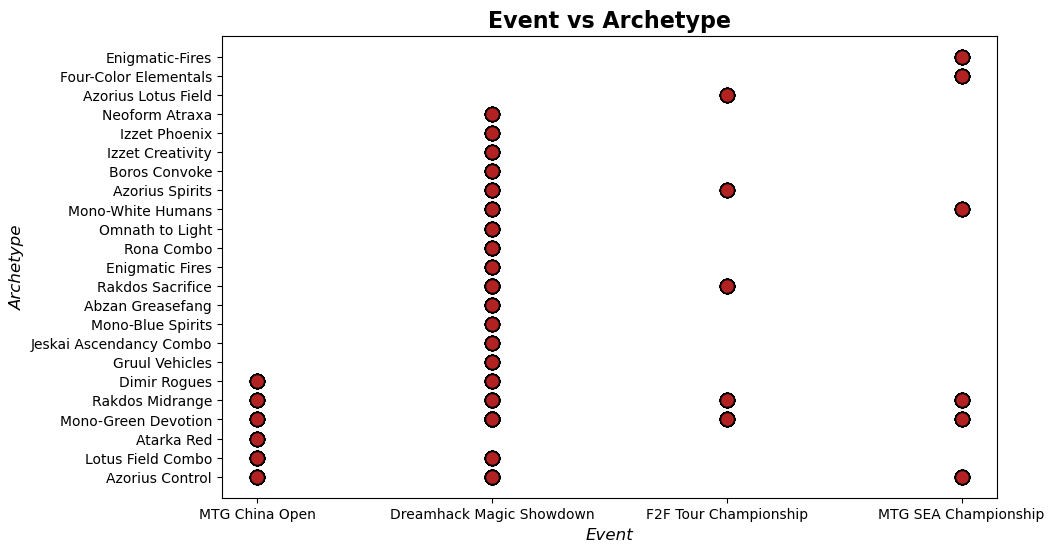

In [18]:
# Step 1: Get the Data
x = df.Event
y = df.Archetype

# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x, y, facecolor="firebrick", edgecolor="black", s=100)

# Step 4: Customizations
plt.xlabel("Event", fontsize=12, fontstyle="italic")
plt.ylabel("Archetype", fontsize=12, fontstyle="italic")
plt.title("Event vs Archetype", fontweight="bold", fontsize=16)
# Save the figure
#plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2306 entries, 0 to 2305
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Card                  2306 non-null   object 
 1   Quantity              2306 non-null   int64  
 2   Pilot                 2306 non-null   object 
 3   Archetype             2306 non-null   object 
 4   Event                 2306 non-null   object 
 5   Main/Sideboard        2306 non-null   object 
 6   Mana Value            2306 non-null   float64
 7   Mana Cost             2306 non-null   object 
 8   Colours               2306 non-null   object 
 9   Most Recent Printing  2306 non-null   object 
 10  Card Text             2096 non-null   object 
 11  Type Line             2306 non-null   object 
 12  Price USD             2231 non-null   float64
 13  Rarity                2306 non-null   object 
dtypes: float64(2), int64(1), object(11)
memory usage: 252.3+ KB


In [15]:
df["Printing Dates"]=pd.to_datetime(df["Most Recent Printing"])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2306 entries, 0 to 2305
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Card                  2306 non-null   object        
 1   Quantity              2306 non-null   int64         
 2   Pilot                 2306 non-null   object        
 3   Archetype             2306 non-null   object        
 4   Event                 2306 non-null   object        
 5   Main/Sideboard        2306 non-null   object        
 6   Mana Value            2306 non-null   float64       
 7   Mana Cost             2306 non-null   object        
 8   Colours               2306 non-null   object        
 9   Most Recent Printing  2306 non-null   object        
 10  Card Text             2096 non-null   object        
 11  Type Line             2306 non-null   object        
 12  Price USD             2231 non-null   float64       
 13  Rarity            

In [19]:
today = pd.Timestamp("2024-06-03")

In [20]:
df["Printing Age"] = (today-df["Printing Dates"]).dt.days
df.head()

,Card,Quantity,Pilot,Archetype,Event,Main/Sideboard,Mana Value,Mana Cost,Colours,Most Recent Printing,Card Text,Type Line,Price USD,Rarity,Printing Dates,Printing Age
0,Hallowed Fountain,4,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,['L'],['L'],2019-01-25,({T}: Add {W} or {U}.)\nAs Hallowed Fountain e...,Land — Plains Island,11.31,rare,2019-01-25,1956
1,Prairie Stream,2,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,['L'],['L'],2023-04-21,({T}: Add {W} or {U}.)\nPrairie Stream enters ...,Land — Plains Island,0.16,rare,2023-04-21,409
2,Irrigated Farmland,4,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,['L'],['L'],2020-04-17,({T}: Add {W} or {U}.)\nIrrigated Farmland ent...,Land — Plains Island,0.96,rare,2020-04-17,1508
3,Field of Ruin,2,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,['L'],['L'],2023-04-21,"{T}: Add {C}.\n{2}, {T}, Sacrifice Field of Ru...",Land,0.15,uncommon,2023-04-21,409
4,Fabled Passage,4,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,['L'],['L'],2020-07-03,"{T}, Sacrifice Fabled Passage: Search your lib...",Land,4.80,rare,2020-07-03,1431


In [21]:
df.corr(numeric_only=True)

,Quantity,Mana Value,Price USD,Printing Age
Quantity,1.000000,-0.114507,0.093790,0.058323
Mana Value,-0.114507,1.000000,0.026154,-0.003215
Price USD,0.093790,0.026154,1.000000,0.081572
Printing Age,0.058323,-0.003215,0.081572,1.000000


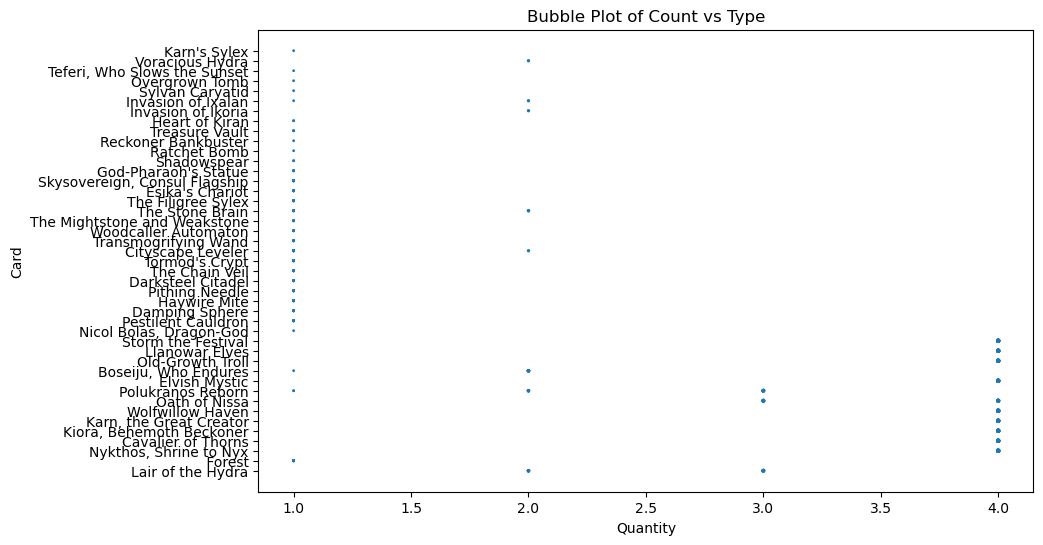

In [29]:
archetype_filter = df['Archetype'] == 'Mono-Green Devotion'
mono_green_filtered_df = df[archetype_filter]



mono_green_filtered_df.plot(
    kind='scatter',
    x='Quantity',
    y='Card',
    s=mono_green_filtered_df['Quantity'],
    figsize=(10, 6)
)

plt.xlabel('Quantity')
plt.ylabel('Card')
plt.title('Bubble Plot of Count vs Type')
plt.show()

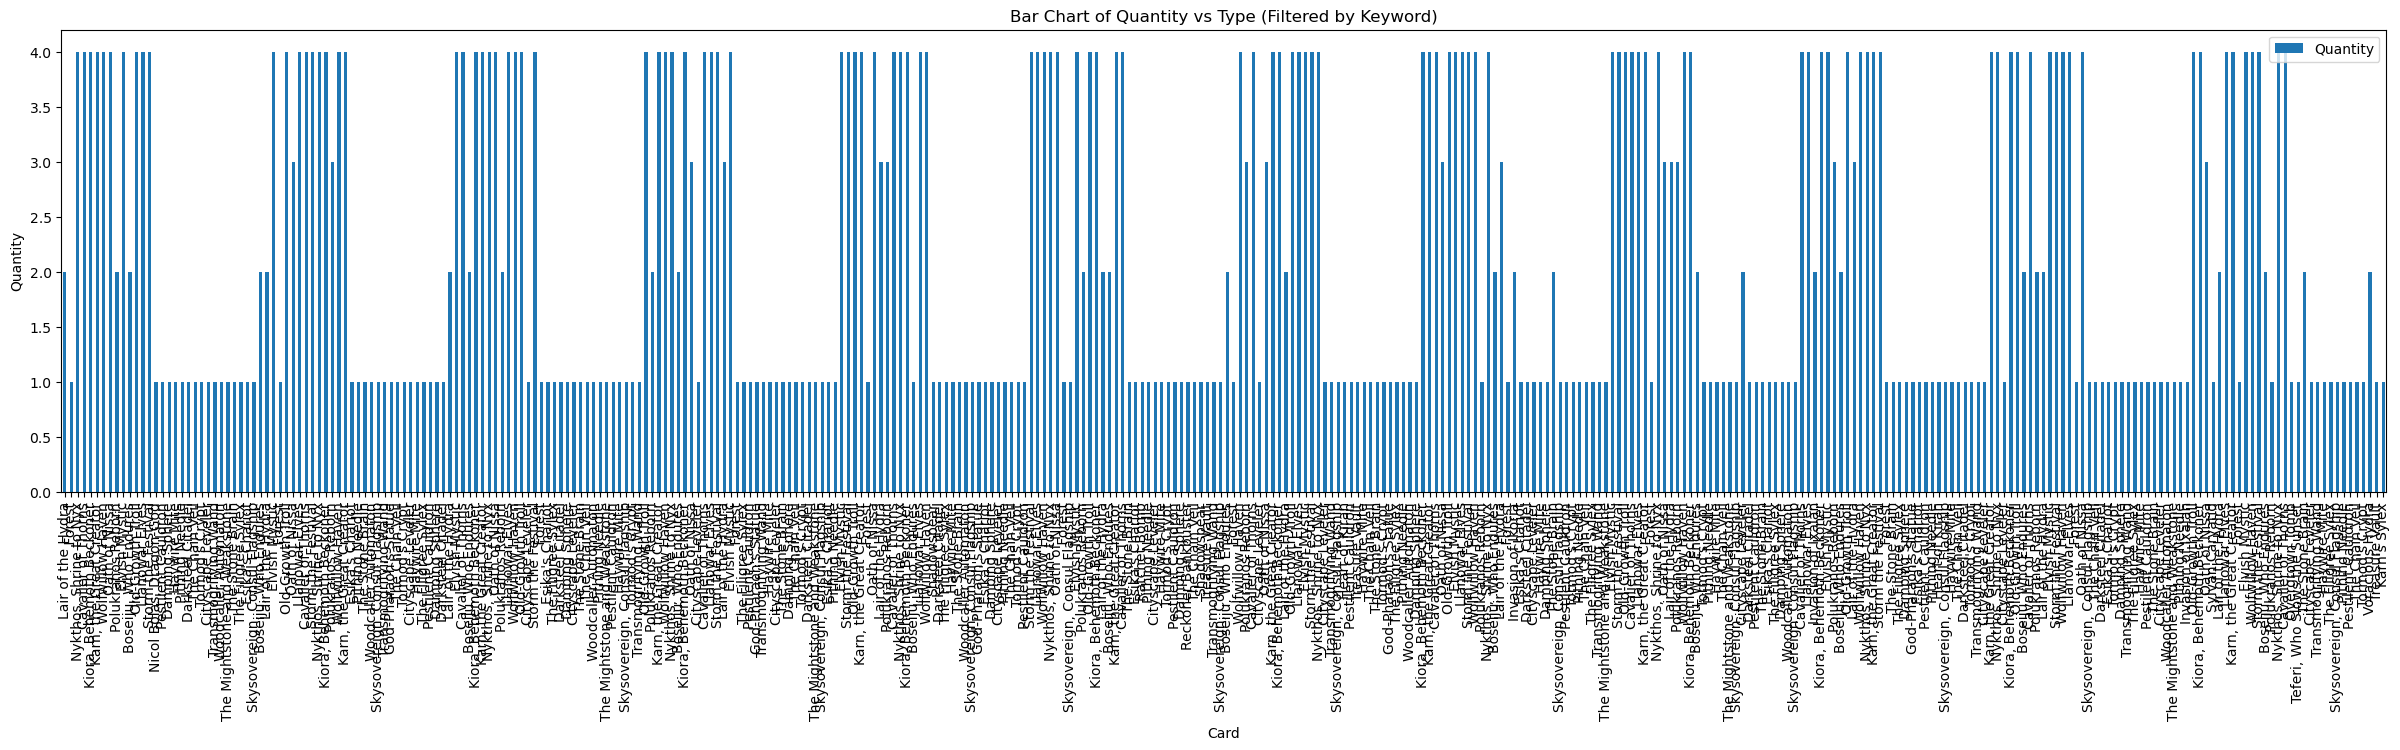

In [36]:



mono_green_filtered_df.plot(kind='bar',
                 x='Card',
                 y='Quantity',
                 figsize=(30, 6)
                )
plt.xlabel('Card')
plt.ylabel('Quantity')
plt.title('Bar Chart of Quantity vs Type (Filtered by Keyword)')
plt.show()

In [ ]:
#sub dataframe from type

In [ ]:
#chnage over time